In [4]:
!pwd
!python --version
!which python

/home/shpaik/22-acml2022/Fig2
Python 3.6.10 :: Anaconda, Inc.
/home/shpaik/anaconda3/envs/py36/bin/python


In [5]:
import os
current_dir = os.getcwd()
current_dir

'/home/shpaik/22-acml2022/Fig2'

In [6]:
my_variable_list = ["gamma", "prop"]

start = {"gamma" : 0, "prop" : 0}
end = {"gamma" : 20, "prop" : 0.3}
step = {"gamma" : 2.5, "prop" : 0.05}

timestamp ={ # to set exact folder location
    # the format is "YYYY.MM.DD(??h??m??s)"
    # (e.g.) 0: "2021.06.04(12h34m56s)"
    "gamma": {
        0: "",
        2.5: "",
        5: "",
        7.5: "",
        10: "",
        12.5: "",
        15: "",
        17.5: "",
        20: ""
    },
    "prop":{
        0: "",
        0.05: "",
        0.1: "",
        0.15: "",
        0.2: "",
        0.25: "",
        0.3: ""
    }
}

In [7]:
import numpy as np 
import networkx as nx
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.sparse import csgraph 
import scipy
import os
import random
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import time
from datetime import datetime

In [8]:
plt.style.use("ggplot")

[]

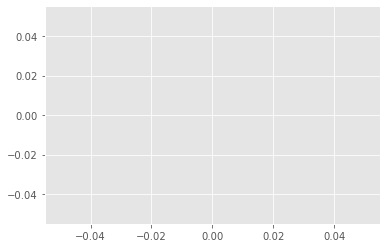

In [9]:
plt.figure()
plt.plot()

In [14]:
# selected_models=["SemiRGraphTS", "IndividualSemiRidgeGraphThompson", "SemiTS_Single", "GraphUCBlocal", "CLUB", "LinTS", "LinTS_Single", "Random"]
selected_models=["SemiRGraphTS", "IndividualSemiRidgeGraphThompson", "SemiTS_Single", "GraphUCBlocal", "SCLUB", "DyClu", "LinTS", "LinTS_Single", "Random"]

colors_dict = {"Random": "gold",
               "RGraphTS" : "r",
               "LinTS" : "g",
               "SemiRGraphTS" : "blue",
               "GraphUCBlocal" : "brown",
               "CLUB" : "slategrey",
               "SCLUB" : "r",
               "DyClu" : "aqua",
               "IndividualSemiRidgeGraphThompson" : "pink",
               "LinTS_Single" : "lime",
               "SemiTS_Single": "m"}

labels_dict = {"Random": "Random",
               "RGraphTS" : "Proposed-Stationary",
               "LinTS" : "LinTS-Ind",
               "SemiRGraphTS" : "Proposed",
               "GraphUCBlocal" : "GraphUCB",
               "CLUB" : "CLUB",
               "SCLUB" : "SCLUB",
               "DyClu" : "DyClu",
               "IndividualSemiRidgeGraphThompson" : "SemiTS-Ind",
               "LinTS_Single" : "LinTS-Sin",
               "SemiTS_Single": "SemiTS-Sin"}

regrets_dict = {}
regrets_dict_lower = {}
regrets_dict_upper = {}
variables_dict = {}

[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20. ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3 ]


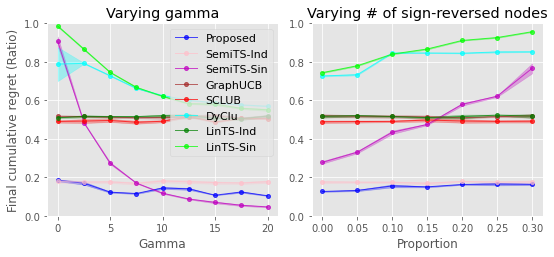

In [16]:
SAVE = False
SAVE = True

fig, axs = plt.subplots(1, len(my_variable_list), figsize=(len(my_variable_list) * 4, 4))

for idx, my_variable in enumerate(my_variable_list):
    regrets_dict = {}
    variables = np.arange(start[my_variable], end[my_variable] + 0.001, step[my_variable])
    variables = np.array(list(map(int, 100 * variables))) / 100
    print(variables)
    
    if my_variable == "gamma":
        # file name for gamma
        first = "Sensitivity_" + my_variable +"/results/" + my_variable +"_" # +num
        second = "/arm=sparse_nu=1_g=ER/regret_saving_folder/regret_" # + timestamp
        third = "/cumulated_regret_" # + model
        fourth = "_" + my_variable + "_" # + num
        fifth = ".npy"
        title = "Varying gamma"
    
    elif my_variable == "prop":
        # file name for prop
        first = "Sensitivity_" + my_variable +"/results/" + my_variable +"_" # +num
        second = "/arm=sparse_nu=1_g=ER/regret_saving_folder/regret_" # + timestamp
        third = "/cumulated_regret_"  # + model
        fourth = "_" + my_variable + "_" # + num
        fifth = ".npy"
        title = "Varying # of sign-reversed nodes"
        
    for MODEL in selected_models:
        regrets_dict[MODEL] = {}
        regrets_dict_lower[MODEL] = {}
        regrets_dict_upper[MODEL] = {}
        for VAR in variables:
            NUM = int(VAR) if int(VAR) == VAR else VAR
            if my_variable == "gamma":
                file = np.load(first + str(NUM) + second + timestamp[my_variable][NUM] + third + MODEL + fourth + str(NUM) + fifth)
            elif my_variable == "prop":
                file = np.load(first + str(NUM) + second + timestamp[my_variable][NUM] + third + MODEL + fourth + str(NUM) + fifth)
            regrets_dict[MODEL][VAR] = np.mean(file, axis=0)[-1]
            regrets_dict_lower[MODEL][VAR] = regrets_dict[MODEL][VAR] - 1.96 * np.std(file, axis=0)[-1] / np.sqrt(5)
            regrets_dict_upper[MODEL][VAR] = regrets_dict[MODEL][VAR] + 1.96 * np.std(file, axis=0)[-1] / np.sqrt(5)
            
    denominator = np.array(list(regrets_dict["Random"].values()))
    for MODEL in selected_models:
        if MODEL in ["Random"]:
            continue
        LABEL = labels_dict[MODEL]
        y = np.array(list(regrets_dict[MODEL].values())) / denominator
        y_lower = np.array(list(regrets_dict_lower[MODEL].values())) / denominator
        y_upper = np.array(list(regrets_dict_upper[MODEL].values())) / denominator
        
        axs[idx].plot(variables, y, color = colors_dict[MODEL], linewidth = 1, alpha = 0.7, label = LABEL, marker = 'o', ms=4)
        axs[idx].fill_between(variables, y_lower, y_upper, color = colors_dict[MODEL], alpha=0.3)

        if my_variable == "gamma":
            axs[idx].set(xlabel = "Gamma", ylabel = "Final cumulative regret (Ratio)")
        if my_variable == "prop":
            axs[idx].set(xlabel = "Proportion")
            
        axs[idx].set_ylim([0, 1])
        axs[idx].set_title(title)
        
axs[0].legend(loc="upper right", fontsize = 11)        
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

if SAVE == True:
    IMG_PATH = "Fig2.pdf"
    plt.savefig(IMG_PATH, bbox_inches='tight')

fig.show()             